In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
df = pd.read_csv("data/cleaned_data.csv")
df = df[df['Year'] < 2023]
df

,Unnamed: 0,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,1454,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0,1,False
1,1455,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0,1,False
2,1456,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0,1,False
3,1457,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0,1,False
4,1458,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4743,6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1,False
4744,6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1,False
4745,6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1,False
4746,6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1,False


In [129]:
df.drop(['Unnamed: 0', 'Rainfall', 'ExtremeRainfall'], axis=1, inplace=True)
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
0,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0
1,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0
2,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0
3,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0
4,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0
...,...,...,...,...,...,...,...,...,...
4743,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0
4744,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0
4745,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0
4746,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0


In [130]:
df.isna().sum()

Year             0
Month            0
Day              0
MaxT             0
MinT             0
AvgT             0
WindSpeed        0
Humidity         0
Precipitation    0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4748 non-null   int64  
 1   Month          4748 non-null   int64  
 2   Day            4748 non-null   int64  
 3   MaxT           4748 non-null   float64
 4   MinT           4748 non-null   float64
 5   AvgT           4748 non-null   float64
 6   WindSpeed      4748 non-null   float64
 7   Humidity       4748 non-null   float64
 8   Precipitation  4748 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 334.0 KB


In [132]:
df.describe()

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
count,4748.00000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.00000,4748.000000
mean,2016.00000,6.523168,15.728939,33.359183,24.782056,29.070619,2.855055,67.58056,3.447683
std,3.74177,3.449001,8.800724,3.357061,3.097914,2.943477,1.021489,11.66672,8.430026
min,2010.00000,1.000000,1.000000,21.900000,14.400000,20.550000,0.900000,30.50000,0.000000
25%,2013.00000,4.000000,8.000000,30.900000,22.600000,26.850000,2.100000,59.70000,0.000000
50%,2016.00000,7.000000,16.000000,33.000000,25.400000,29.050000,2.600000,68.70000,0.000000
75%,2019.00000,10.000000,23.000000,35.300000,27.000000,31.000000,3.400000,76.50000,2.500000
max,2022.00000,12.000000,31.000000,48.000000,33.000000,39.500000,7.900000,95.10000,128.300000


<Axes: >

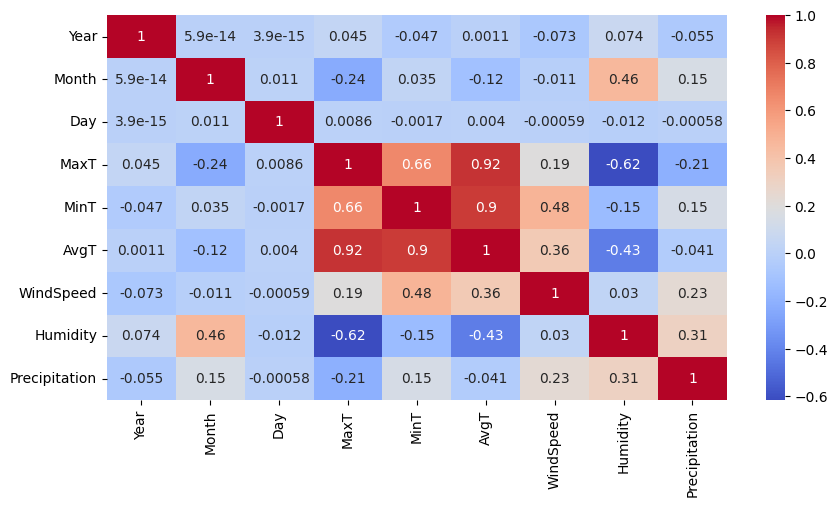

In [133]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Precipitation and Humidity Correlation

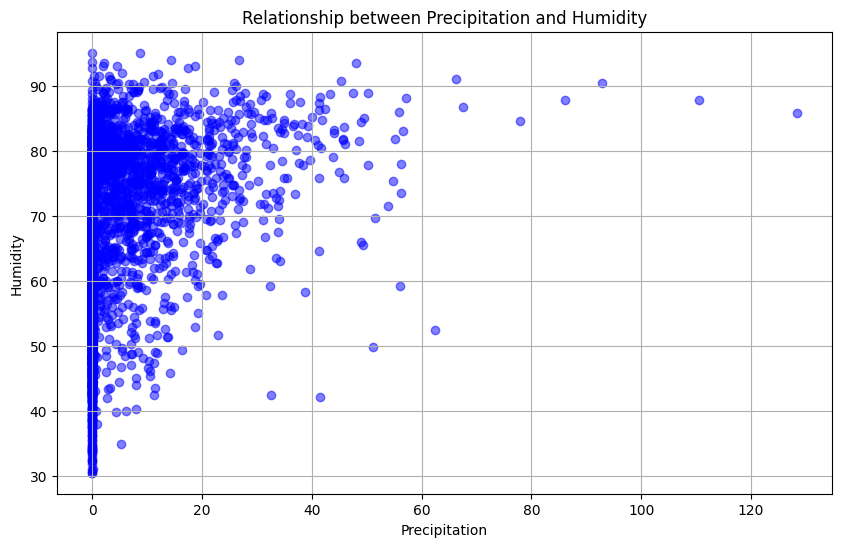

In [134]:
def bar_graph(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], color='blue', alpha=0.5)
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'Humidity'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Windspeed Correlation

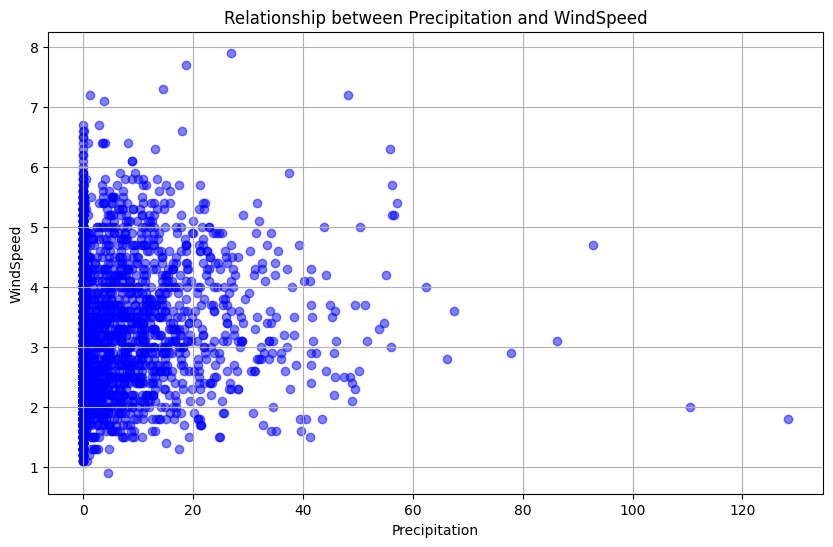

In [135]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'WindSpeed'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Max Temperature

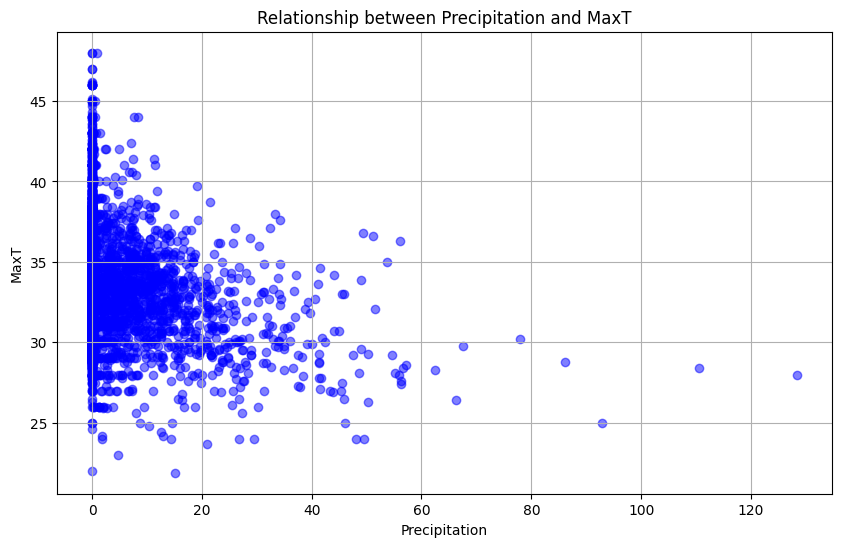

In [136]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'MaxT'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Minimum Temperature

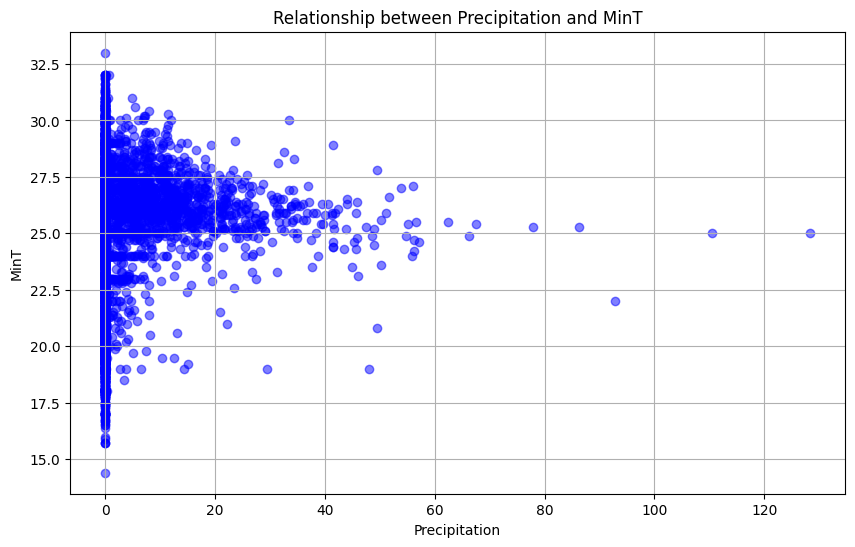

In [137]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'MinT'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Month Correlation

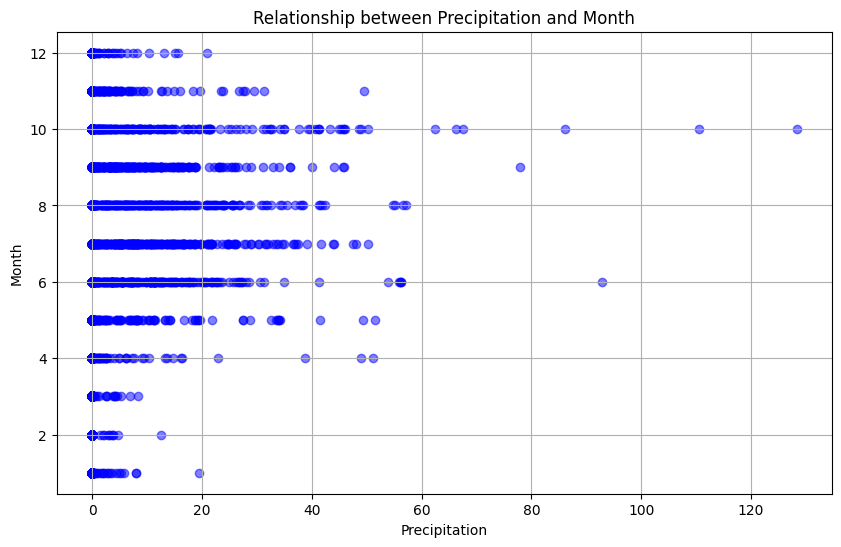

In [138]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'Month'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

In [182]:
df[df['Precipitation'] > 2.5]

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,PrecipitationBinary
71,2010,3,13,35.1,25.1,30.10,2.1,59.5,2.6,1
72,2010,3,14,34.6,26.0,30.30,2.6,59.3,2.6,1
110,2010,4,21,37.1,26.6,31.85,3.5,51.3,13.7,1
123,2010,5,4,36.9,27.1,32.00,2.7,57.8,5.0,1
137,2010,5,18,37.6,28.9,33.25,2.6,59.2,19.3,1
...,...,...,...,...,...,...,...,...,...,...
4665,2022,10,10,27.0,23.0,25.00,4.1,91.0,3.3,1
4666,2022,10,11,30.0,24.0,27.00,2.7,86.0,2.8,1
4673,2022,10,18,31.0,24.0,27.50,1.3,82.0,2.6,1
4676,2022,10,21,30.0,23.0,26.50,3.5,82.5,2.6,1


In [189]:
percentile_95 = df['Precipitation'].quantile(0.95)

filtered_data = df[df['Precipitation'] >= percentile_95]

filtered_data

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,PrecipitationBinary,19.6
138,2010,5,19,30.1,26.2,28.15,3.1,71.5,33.8,1,19.6
139,2010,5,20,29.7,26.2,27.95,3.1,67.5,33.8,1,19.6
140,2010,5,21,29.1,25.8,27.45,2.4,65.4,21.9,1,19.6
169,2010,6,19,30.8,26.5,28.65,3.2,72.9,21.8,1,19.6
180,2010,6,30,36.2,26.1,31.15,3.8,74.8,25.7,1,19.6
...,...,...,...,...,...,...,...,...,...,...,...
4243,2021,8,14,34.0,24.0,29.00,3.1,73.0,25.4,1,19.6
4245,2021,8,16,27.0,21.0,24.00,5.4,89.0,22.2,1,19.6
4349,2021,11,28,24.0,19.0,21.50,3.8,86.0,29.5,1,19.6
4553,2022,6,20,28.0,25.0,26.50,1.9,87.5,20.1,1,19.6


# Train and Test Split

In [166]:
df['PrecipitationBinary'] = np.where(df['Precipitation'] > 0, 1, 0)
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,PrecipitationBinary
0,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0,0
1,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0,0
2,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0,0
3,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0,0
4,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4743,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,0
4744,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,0
4745,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,0
4746,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,0


In [167]:
from sklearn.model_selection import train_test_split

# Filter the dataset for days with precipitation > 0
df_with_precip = df[df['Precipitation'] > 0]

# Define features (X) and target (y) for regression
X_reg = df_with_precip.drop(['Precipitation', 'PrecipitationBinary'], axis=1)
y_reg = df_with_precip['Precipitation']

# Split the data for regression model
trainX_reg, testX_reg, trainY_reg, testY_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Choose a regression model (e.g., Linear Regression, Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model_reg.fit(trainX_reg, trainY_reg)

# Predict on the test data
prediction_reg = model_reg.predict(testX_reg)

# Evaluate the regression model (e.g., using Mean Squared Error, R2 Score)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(testY_reg, prediction_reg)
r2 = r2_score(testY_reg, prediction_reg)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 99.71445622683706
R2 Score: 0.37843233440943125


In [168]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [169]:
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Assume 'Precipitation' is the target variable and the rest are features
X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(trainX.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (predicts precipitation in mm)
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Model Training
model.fit(trainX, trainY, epochs=10, validation_split=0.2, batch_size=10)

# Model Evaluation
model.evaluate(testX, testY)

Epoch 1/10
304/304 [==============================] - 0s 580us/step - loss: 2.7959 - accuracy: 0.6550 - val_loss: 2.3845 - val_accuracy: 0.6421
Epoch 2/10
304/304 [==============================] - 0s 427us/step - loss: 2.2577 - accuracy: 0.6675 - val_loss: 2.2918 - val_accuracy: 0.6500
Epoch 3/10
304/304 [==============================] - 0s 439us/step - loss: 2.1699 - accuracy: 0.6728 - val_loss: 2.1948 - val_accuracy: 0.6566
Epoch 4/10
304/304 [==============================] - 0s 448us/step - loss: 2.1350 - accuracy: 0.6738 - val_loss: 2.1888 - val_accuracy: 0.6579
Epoch 5/10
304/304 [==============================] - 0s 431us/step - loss: 2.1000 - accuracy: 0.6741 - val_loss: 2.2278 - val_accuracy: 0.6592
Epoch 6/10
304/304 [==============================] - 0s 422us/step - loss: 2.0850 - accuracy: 0.6748 - val_loss: 2.1536 - val_accuracy: 0.6592
Epoch 7/10
304/304 [==============================] - 0s 437us/step - loss: 2.0704 - accuracy: 0.6751 - val_loss: 2.1435 - val_accuracy:

[2.0036046504974365, 0.6768420934677124]

In [200]:
template_df = pd.DataFrame(columns=X.columns)

# Populate the template with your input data
# This step ensures that the input data has the correct columns and order
input_data = {
    'Year': 2010,
    'Month': 4,
    'Day': 21,
    'MaxT': 37.1,  # Example max temperature
    'MinT': 26.6,  # Example min temperature
    'AvgT': 31.85,  # Example average temperature
    'WindSpeed': 3.5,  # Example wind speed
    'Humidity': 51.3,  # Example humidity
    'PrecipitationBinary': 1,
}

# Convert input data to a DataFrame with a single row
input_df = pd.DataFrame([input_data])

# Ensure input_df has the same column order as the training data
input_df = input_df.reindex(columns=template_df.columns)

input_df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,PrecipitationBinary
0,2010,4,21,37.1,26.6,31.85,3.5,51.3,1


In [201]:
# Scale the input data using the same scaler used for the training data
input_scaled = scaler.transform(input_df)

In [202]:
# Predict precipitation for the input data
predicted_precipitation = model.predict(input_scaled)

# Print the predicted precipitation
print(f"Predicted Precipitation: {predicted_precipitation[0][0]} mm")

1/1 [==============================] - 0s 15ms/step
Predicted Precipitation: 6.467097759246826 mm


In [158]:
df[df['Precipitation'] > 2]

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
71,2010,3,13,35.1,25.1,30.10,2.1,59.5,2.6
72,2010,3,14,34.6,26.0,30.30,2.6,59.3,2.6
110,2010,4,21,37.1,26.6,31.85,3.5,51.3,13.7
123,2010,5,4,36.9,27.1,32.00,2.7,57.8,5.0
137,2010,5,18,37.6,28.9,33.25,2.6,59.2,19.3
...,...,...,...,...,...,...,...,...,...
4666,2022,10,11,30.0,24.0,27.00,2.7,86.0,2.8
4673,2022,10,18,31.0,24.0,27.50,1.3,82.0,2.6
4674,2022,10,19,31.0,24.0,27.50,2.5,82.0,2.4
4676,2022,10,21,30.0,23.0,26.50,3.5,82.5,2.6


In [103]:
from sklearn.model_selection import train_test_split

X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(trainX, trainY)

prediction = model.predict(testX)

In [101]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse = mean_squared_error(testY, prediction)
# Print the MSE and R-squared value
print(f"Mean Squared Error for Linear Regression: {mse}")

r2 = r2_score(testY, prediction)
print(f"r2 score for Linear Regression: {r2}")

Mean Squared Error for Linear Regression: 26.53884459790492
r2 score for Linear Regression: 0.5776019112942654


In [96]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your features and target variable
X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your training data
model.fit(trainX, trainY)

# Make predictions on the test set
predictions = model.predict(testX)

In [97]:
# Calculate and print the MSE and R2 score
mse = mean_squared_error(testY, predictions)
r2 = r2_score(testY, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 28.05409458280148
R2 Score: 0.553484859205938
